# Polynomial Regression Example

In [1]:
# import sys
# sys.path.append('../../pyLearnAlgorithms')
from scipy.io import loadmat
import os
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.polynomial_regression import PolynomialRegression

In [2]:
dr = '../datasets'
fl = 'WaterLevel.mat'
mat_path = os.path.join(dr, fl)
data = loadmat(mat_path)
X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

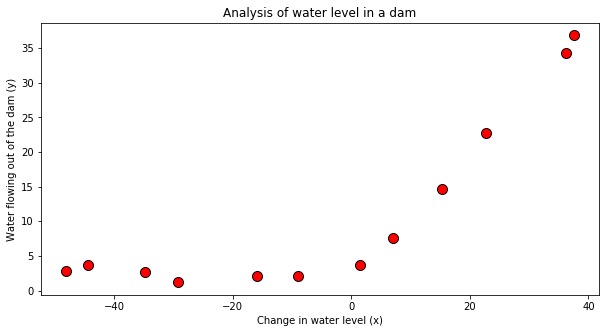

In [3]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data(xlabel = 'Change in water level (x)',
                        ylabel = 'Water flowing out of the dam (y)', 
                        title = 'Analysis of water level in a dam')

In [4]:
regressor = PolynomialRegression(X, y)
X_poly = regressor.poly_features(X, poly_degree = 8)
X_poly, mu, sigma = regressor.feature_normalize(X_poly)

In [5]:
Xval = regressor.prepare_extracts(Xval, yval, mu, sigma, poly_degree = 8)
Xtest = regressor.prepare_extracts(Xtest, ytest, mu, sigma, poly_degree = 8)

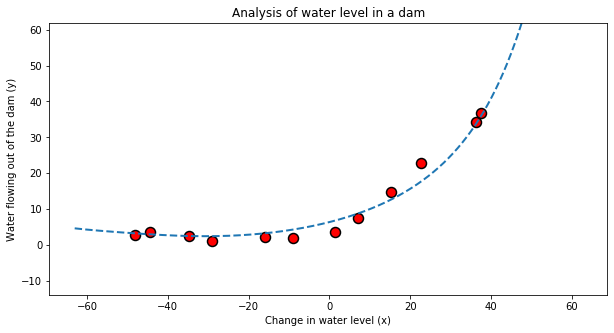

In [6]:
dataset_graph = GraphView(X, y)
dataset_graph.model_poly(xlabel = 'Change in water level (x)',
                         ylabel = 'Water flowing out of the dam (y)',
                         title = 'Analysis of water level in a dam', 
                         Xpoly = X_poly, y = y, poly_degree = 8, mu = mu, sigma = sigma,
                         lambda_ = 1,
                         maxiter = 200)

In [7]:
train_error, val_error = regressor.learning_curve(X_poly, y, Xval, yval, lambda_ = 1)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			1.1505431327590376e-15	138.8467779872426
2			0.07269435561983893	143.52543567774057
3			18.49879263050847	7.761484706947458
4			14.575863676895466	9.100635712171815
5			11.660715248223665	9.12490438126104
6			10.118819839707507	10.91893356940144
7			9.416317278422365	8.362312997217542
8			8.256223553631845	8.119617894002367
9			7.8020764685364785	8.917595762258163
10			7.0643982494921325	8.660556679116091
11			6.423784062552935	8.723349974506984
12			7.268148104117172	7.227429557775281


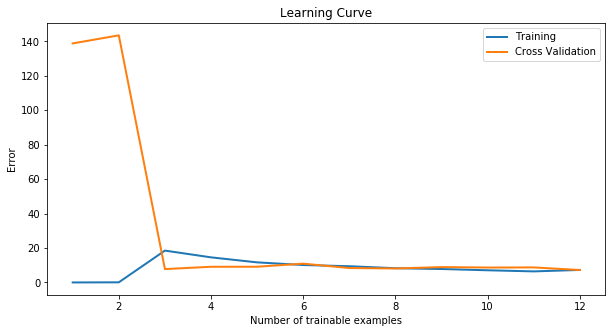

In [8]:
dataset_graph.learning_curve(train_error, val_error)

In [9]:
error_train, error_val = regressor.validation_curve(X_poly, y, Xval, yval,
                                                    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			1.1505431327590376e-15	138.8467779872426
2			0.07269435561983893	143.52543567774057
3			18.49879263050847	7.761484706947458
4			14.575863676895466	9.100635712171815
5			11.660715248223665	9.12490438126104
6			10.118819839707507	10.91893356940144
7			9.416317278422365	8.362312997217542
8			8.256223553631845	8.119617894002367
9			7.8020764685364785	8.917595762258163
10			7.0643982494921325	8.660556679116091
11			6.423784062552935	8.723349974506984
12			7.268148104117172	7.227429557775281


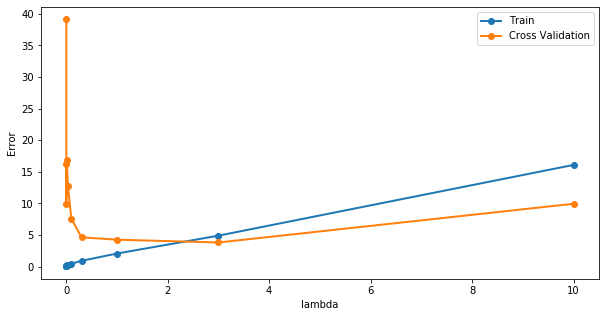

In [10]:
dataset_graph.validation_curve_poly(X_poly, y, Xval, yval, 
                                    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])

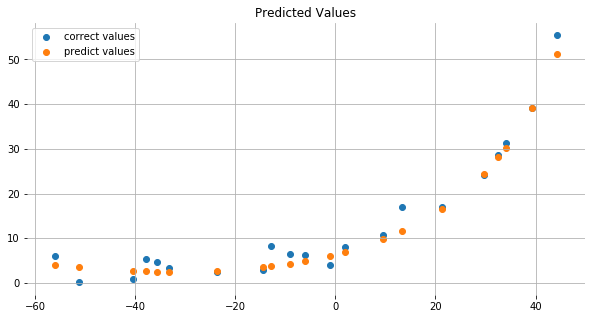

In [11]:
pred = regressor.predict(Xtest, X_poly, y, lambda_ = 1) 
dataset_graph.predicted_values(data['Xtest'], ytest, pred)